In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import random



<h1>Figure A, reconstruction</h1>
Simulate cyclic gene expression matrix, shuffle the rows and apply the reconstruction algorithm to order the rows according to cyclic ordering.

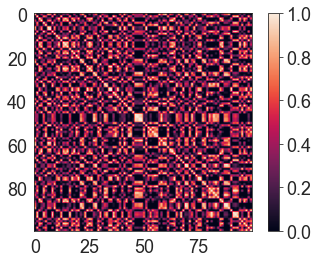

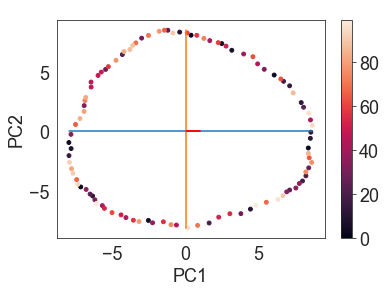

Iteration number: 
0
 function value= 
1.356801535993059e-26
Iteration number: 
25
 function value= 
724.8645014825499
Iteration number: 
50
 function value= 
804.8496924165577
Iteration number: 
75
 function value= 
820.9288164766544


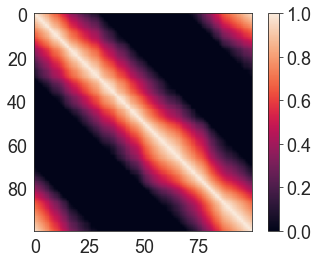

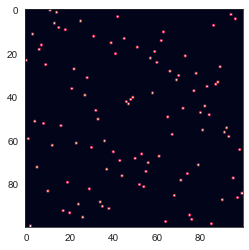

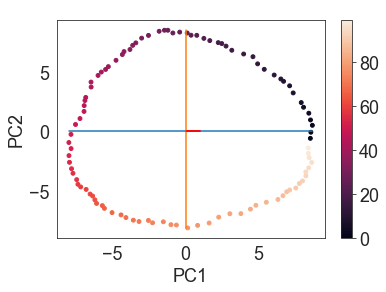

In [3]:
##Figure A, reconstruction
A = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
np.random.shuffle(A)
plot_covariance_matrix(cell_normalization(A),title="Covariance matrix - shuffled cyclic signal")
ranged_pca_2d(A,range(A.shape[0]),title=" ")
E , E_rec = sga_m_reorder_rows_matrix(A,iterNum=100,batch_size=90)
plot_covariance_matrix(cell_normalization(E_rec.dot(A)),title="Covariance matrix - reordered cyclic signal")
plt.imshow(E_rec)
plt.show()
ranged_pca_2d(E_rec.dot(A),range(A.shape[0]),title=" ")

<h1>Figure B, reconstruction</h1>
Accuracy of the reconstruction algorithm as a function of the amount of Gaussian noise we add to the cyclic signal.

In [4]:
##Figure B, reconstruction
noise_list =[]

corr_list = []
snr_list = []
T = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        K = T + noise
        K = np.clip(K,0,np.inf)
        E_sga  , E_rec_sga = reconstruction_cyclic(K,iterNum=100 , verbose=False)
        res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        corr_list.append(res)
        noise_list.append(0.3 + i*0.02)
        print(res)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)


Iteration number: 0
0.9910231023102309
Iteration number: 1
0.99996399639964
Iteration number: 2
0.9999519951995199
Iteration number: 3
0.9999159915991598
Iteration number: 4
0.9007980798079807
Iteration number: 5
0.9998799879987997
Iteration number: 6
0.9997599759975996
Iteration number: 7
0.9998079807980798
Iteration number: 8
0.9996759675967596
Iteration number: 9
0.9989198919891988
Iteration number: 10
0.9994239423942393
Iteration number: 11
0.9998079807980798
Iteration number: 12
0.9996639663966396
Iteration number: 13
0.9747854785478548
Iteration number: 14
0.9425982598259824
Iteration number: 15
0.999147914791479
Iteration number: 16
0.9968556855685567
Iteration number: 17
0.9894749474947493
Iteration number: 18
0.9991119111911191
Iteration number: 19
0.9993999399939993
Iteration number: 20
0.9994119411941192
Iteration number: 21
0.885076507650765
Iteration number: 22
0.9402340234023402
Iteration number: 23
0.9992079207920791
Iteration number: 24
0.9406420642064206
Iteration numb

0.2596219621962196
Iteration number: 203
0.29308130813081307
Iteration number: 204
0.22868286828682866
Iteration number: 205
0.1785418541854185
Iteration number: 206
0.2722112211221122
Iteration number: 207
0.36588058805880586
Iteration number: 208
0.2905010501050104
Iteration number: 209
0.19227122712271227
Iteration number: 210
0.24523252325232522
Iteration number: 211
0.31480348034803474
Iteration number: 212
0.22435043504350435
Iteration number: 213
0.26255025502550255
Iteration number: 214
0.43747974797479744
Iteration number: 215
0.26816681668166814
Iteration number: 216
0.2872487248724872
Iteration number: 217
0.21136513651365135
Iteration number: 218
0.24200420042004198
Iteration number: 219
0.4406120612061205
Iteration number: 220
0.25117311731173114
Iteration number: 221
0.2249504950495049
Iteration number: 222
0.2517251725172517
Iteration number: 223
0.278991899189919
Iteration number: 224
0.36766876687668765
Iteration number: 225
0.25700570057005695
Iteration number: 226
0.

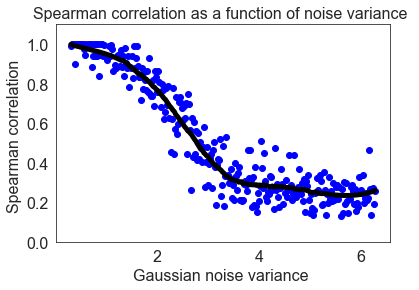

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/3711121518.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(snr_list,corr_list, 'bo',color='r')


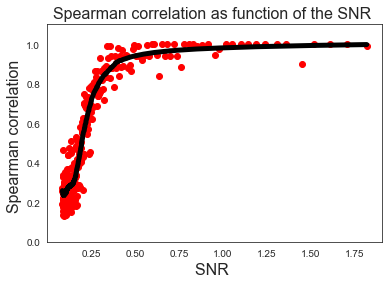

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/3711121518.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(corr_list)), 'bo',color='b')


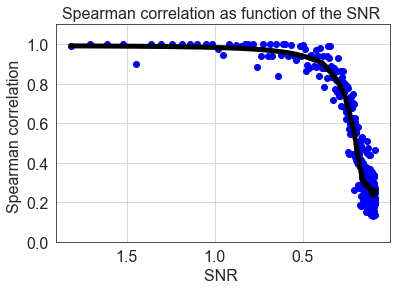

In [5]:
plt.plot(noise_list,corr_list, 'bo', noise_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()
plt.plot(snr_list,corr_list, 'bo',color='r')
plt.plot( snr_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as function of the SNR ",  fontsize=16)
plt.xlabel("SNR ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.ylim(0, 1.1)
plt.show()
fig, ax = plt.subplots()

ax.plot((np.array(snr_list)),(np.array(corr_list)), 'bo',color='b')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(corr_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR " ,  fontsize=16)
ax.set_ylabel("Spearman correlation " ,  fontsize=16)
ax.set_title("Spearman correlation as function of the SNR " ,  fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)

plt.show()


<h1>Figure C, genes inference</h1>
Accuracy of the genes inference algorithm as a function of the amount of Gaussian noise we add.
We simulate 250 "lineage" genes and 250 cyclic genes, and apply the genes inference algorithm with variable amount of Gaussian noise.


In [6]:


##Figure C, inference
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(400):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        K = T + noise
        K = np.clip(K,0,np.inf)
        D = filter_cyclic_genes(K, regu =0 , iterNum=20)
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.3 + i*0.02)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)





Iteration number: 0
Iteration number: 
1
function value= 
6.82534289364279
 AUC-ROC: 1.0
Iteration number: 1
Iteration number: 
1
function value= 
7.190998782597006
 AUC-ROC: 1.0
Iteration number: 2
Iteration number: 
1
function value= 
7.233031130024647
 AUC-ROC: 1.0
Iteration number: 3
Iteration number: 
1
function value= 
7.482493526951599
 AUC-ROC: 1.0
Iteration number: 4
Iteration number: 
1
function value= 
8.117664402761942
 AUC-ROC: 1.0
Iteration number: 5
Iteration number: 
1
function value= 
8.653686973337912
 AUC-ROC: 1.0
Iteration number: 6
Iteration number: 
1
function value= 
8.995494841273436
 AUC-ROC: 1.0
Iteration number: 7
Iteration number: 
1
function value= 
10.249530420266876
 AUC-ROC: 1.0
Iteration number: 8
Iteration number: 
1
function value= 
10.457513843788515
 AUC-ROC: 1.0
Iteration number: 9
Iteration number: 
1
function value= 
11.878819197129522
 AUC-ROC: 1.0
Iteration number: 10
Iteration number: 
1
function value= 
13.311304889479839
 AUC-ROC: 1.0
Iterat

Iteration number: 
1
function value= 
51.19780241540284
 AUC-ROC: 0.872752
Iteration number: 85
Iteration number: 
1
function value= 
51.23843322313594
 AUC-ROC: 0.900624
Iteration number: 86
Iteration number: 
1
function value= 
51.32753494530438
 AUC-ROC: 0.8550080000000001
Iteration number: 87
Iteration number: 
1
function value= 
50.30440016323148
 AUC-ROC: 0.862736
Iteration number: 88
Iteration number: 
1
function value= 
50.08380570641418
 AUC-ROC: 0.831632
Iteration number: 89
Iteration number: 
1
function value= 
50.27657445194655
 AUC-ROC: 0.869584
Iteration number: 90
Iteration number: 
1
function value= 
51.94955968355136
 AUC-ROC: 0.8636159999999999
Iteration number: 91
Iteration number: 
1
function value= 
49.907134258608004
 AUC-ROC: 0.8256159999999999
Iteration number: 92
Iteration number: 
1
function value= 
50.28907346693096
 AUC-ROC: 0.851136
Iteration number: 93
Iteration number: 
1
function value= 
50.43574773386989
 AUC-ROC: 0.846864
Iteration number: 94
Iteration

Iteration number: 
1
function value= 
46.412028079747145
 AUC-ROC: 0.689504
Iteration number: 167
Iteration number: 
1
function value= 
44.219524946307494
 AUC-ROC: 0.6841440000000001
Iteration number: 168
Iteration number: 
1
function value= 
45.10773229589182
 AUC-ROC: 0.6419199999999999
Iteration number: 169
Iteration number: 
1
function value= 
45.53555419538884
 AUC-ROC: 0.6703999999999999
Iteration number: 170
Iteration number: 
1
function value= 
45.38320664778433
 AUC-ROC: 0.673216
Iteration number: 171
Iteration number: 
1
function value= 
46.13059607096173
 AUC-ROC: 0.65712
Iteration number: 172
Iteration number: 
1
function value= 
44.66362227693864
 AUC-ROC: 0.639808
Iteration number: 173
Iteration number: 
1
function value= 
45.132518481246656
 AUC-ROC: 0.621472
Iteration number: 174
Iteration number: 
1
function value= 
45.14260958249575
 AUC-ROC: 0.673376
Iteration number: 175
Iteration number: 
1
function value= 
44.436906190689264
 AUC-ROC: 0.6186400000000001
Iteration

Iteration number: 
1
function value= 
44.673253476681694
 AUC-ROC: 0.623264
Iteration number: 249
Iteration number: 
1
function value= 
43.957813073094016
 AUC-ROC: 0.590784
Iteration number: 250
Iteration number: 
1
function value= 
43.776242492817545
 AUC-ROC: 0.609248
Iteration number: 251
Iteration number: 
1
function value= 
44.294016947670116
 AUC-ROC: 0.595776
Iteration number: 252
Iteration number: 
1
function value= 
42.91682864460305
 AUC-ROC: 0.6459520000000001
Iteration number: 253
Iteration number: 
1
function value= 
44.41544080764035
 AUC-ROC: 0.564736
Iteration number: 254
Iteration number: 
1
function value= 
44.59683349269387
 AUC-ROC: 0.558528
Iteration number: 255
Iteration number: 
1
function value= 
43.47915153994086
 AUC-ROC: 0.580336
Iteration number: 256
Iteration number: 
1
function value= 
44.39630311977825
 AUC-ROC: 0.6114719999999999
Iteration number: 257
Iteration number: 
1
function value= 
43.73645781279551
 AUC-ROC: 0.556576
Iteration number: 258
Iterat

Iteration number: 
1
function value= 
43.29867872874197
 AUC-ROC: 0.546592
Iteration number: 332
Iteration number: 
1
function value= 
43.83223903139192
 AUC-ROC: 0.604704
Iteration number: 333
Iteration number: 
1
function value= 
43.84363321699125
 AUC-ROC: 0.54376
Iteration number: 334
Iteration number: 
1
function value= 
44.625432810172434
 AUC-ROC: 0.545488
Iteration number: 335
Iteration number: 
1
function value= 
43.15683836604816
 AUC-ROC: 0.547568
Iteration number: 336
Iteration number: 
1
function value= 
44.448579282082946
 AUC-ROC: 0.560416
Iteration number: 337
Iteration number: 
1
function value= 
43.65993015218038
 AUC-ROC: 0.558496
Iteration number: 338
Iteration number: 
1
function value= 
43.82611476722209
 AUC-ROC: 0.580192
Iteration number: 339
Iteration number: 
1
function value= 
43.02046131019037
 AUC-ROC: 0.579344
Iteration number: 340
Iteration number: 
1
function value= 
44.503380559708276
 AUC-ROC: 0.5882719999999999
Iteration number: 341
Iteration number: 

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/94379892.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(noise_list)),auc_list, 'bo',color='r')


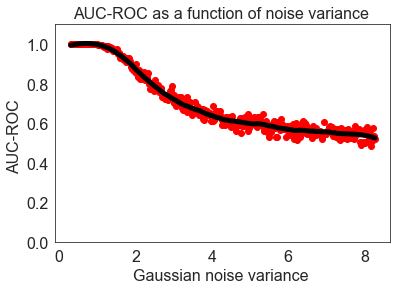

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/94379892.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='b')


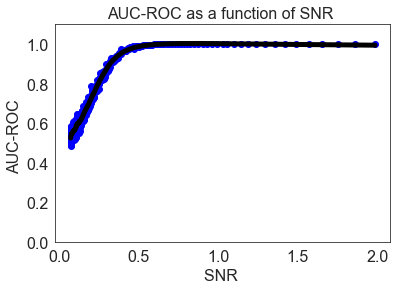

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/94379892.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='r')


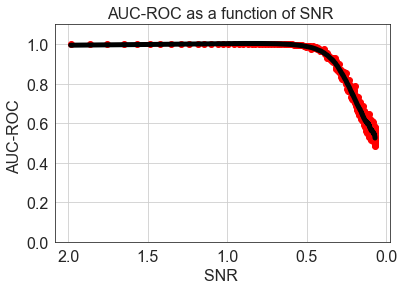

In [7]:
plt.plot((np.array(noise_list)),auc_list, 'bo',color='r')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()


plt.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='b')
plt.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of SNR ",  fontsize=16)
plt.xlabel("SNR ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()

fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='r')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ",  fontsize=16)
ax.set_ylabel("AUC-ROC ",  fontsize=16)
ax.set_title("AUC-ROC as a function of SNR ",  fontsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()



<h1>Linear genes inference</h1>
Accuracy of the genes inference algorithm as a function of the amount of Gaussian noise we add.
We simulate 250 "lineage" genes and 250 linear genes, and apply the genes inference algorithm with variable amount of Gaussian noise.


In [8]:
## Inference linear
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_window_linear(ngenes=500,ncells=B.shape[0],w=0.3)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        K = T + noise
        K = np.clip(K,0,np.inf)
        D = filter_linear_genes(K, regu =0 , iterNum=20 , method='numeric')
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.3 + i*0.02)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)






Iteration number: 0


/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:351: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  ATUUTA = (2 * ((((A.T).dot(U)).dot(U.T)).dot(A)))#.dot(D)) - regu*np.sign(D)#((1 / t_0) * ((A.T).dot(A)).dot(D))
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:351: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  ATUUTA = (2 * ((((A.T).dot(U)).dot(U.T)).dot(A)))#.dot(D)) - regu*np.sign(D)#((1 / t_0) * ((A.T).dot(A)).dot(D))
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:355: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  val = np.trace((((((U.T).dot(A)).dot(D)).dot(D.T)).dot(A.T)).dot(U)) - regu*np.linalg.norm(D,1)


Iteration number: 
1
function value= 
21.143492954140747
 AUC-ROC: 0.999088
Iteration number: 1
Iteration number: 
1
function value= 
22.487425394364838
 AUC-ROC: 0.998368
Iteration number: 2
Iteration number: 
1
function value= 
24.46917283579604
 AUC-ROC: 0.998144
Iteration number: 3
Iteration number: 
1
function value= 
25.176421710706503
 AUC-ROC: 0.9989279999999999
Iteration number: 4
Iteration number: 
1
function value= 
27.52454979169059
 AUC-ROC: 0.997392
Iteration number: 5
Iteration number: 
1
function value= 
28.40787719800264
 AUC-ROC: 0.9981599999999999
Iteration number: 6
Iteration number: 
1
function value= 
29.214352498258613
 AUC-ROC: 0.99888
Iteration number: 7
Iteration number: 
1
function value= 
31.390416000778824
 AUC-ROC: 0.997632
Iteration number: 8
Iteration number: 
1
function value= 
33.03060900289624
 AUC-ROC: 0.998416
Iteration number: 9
Iteration number: 
1
function value= 
34.42389686227862
 AUC-ROC: 0.998864
Iteration number: 10
Iteration number: 
1
func

Iteration number: 
1
function value= 
34.957202293024764
 AUC-ROC: 0.83304
Iteration number: 84
Iteration number: 
1
function value= 
35.07682521763871
 AUC-ROC: 0.860832
Iteration number: 85
Iteration number: 
1
function value= 
34.312440488403674
 AUC-ROC: 0.850864
Iteration number: 86
Iteration number: 
1
function value= 
34.59380053218977
 AUC-ROC: 0.8324159999999999
Iteration number: 87
Iteration number: 
1
function value= 
35.783351452827745
 AUC-ROC: 0.825744
Iteration number: 88
Iteration number: 
1
function value= 
35.46565076744891
 AUC-ROC: 0.8331839999999999
Iteration number: 89
Iteration number: 
1
function value= 
33.9863464975267
 AUC-ROC: 0.826512
Iteration number: 90
Iteration number: 
1
function value= 
35.13694449127072
 AUC-ROC: 0.8173919999999999
Iteration number: 91
Iteration number: 
1
function value= 
34.01926449597111
 AUC-ROC: 0.809104
Iteration number: 92
Iteration number: 
1
function value= 
33.11752550855988
 AUC-ROC: 0.8152800000000001
Iteration number: 93

Iteration number: 
1
function value= 
31.422052165110195
 AUC-ROC: 0.624688
Iteration number: 165
Iteration number: 
1
function value= 
31.148029160520608
 AUC-ROC: 0.673856
Iteration number: 166
Iteration number: 
1
function value= 
31.176201724116233
 AUC-ROC: 0.649472
Iteration number: 167
Iteration number: 
1
function value= 
31.120178791733714
 AUC-ROC: 0.621472
Iteration number: 168
Iteration number: 
1
function value= 
31.144689038365595
 AUC-ROC: 0.655664
Iteration number: 169
Iteration number: 
1
function value= 
30.260777965135304
 AUC-ROC: 0.6296959999999999
Iteration number: 170
Iteration number: 
1
function value= 
32.28092864106311
 AUC-ROC: 0.639248
Iteration number: 171
Iteration number: 
1
function value= 
30.797552106584682
 AUC-ROC: 0.6255200000000001
Iteration number: 172
Iteration number: 
1
function value= 
30.062814509948776
 AUC-ROC: 0.607728
Iteration number: 173
Iteration number: 
1
function value= 
31.561673201953383
 AUC-ROC: 0.617792
Iteration number: 174
I

Iteration number: 
1
function value= 
29.422699707369322
 AUC-ROC: 0.586592
Iteration number: 247
Iteration number: 
1
function value= 
29.843948329511022
 AUC-ROC: 0.6334559999999999
Iteration number: 248
Iteration number: 
1
function value= 
29.954263873569907
 AUC-ROC: 0.5627519999999999
Iteration number: 249
Iteration number: 
1
function value= 
29.236213851774878
 AUC-ROC: 0.5186240000000001
Iteration number: 250
Iteration number: 
1
function value= 
29.265675790817255
 AUC-ROC: 0.5392
Iteration number: 251
Iteration number: 
1
function value= 
30.281837900583294
 AUC-ROC: 0.5715840000000001
Iteration number: 252
Iteration number: 
1
function value= 
31.0057825387581
 AUC-ROC: 0.5584000000000001
Iteration number: 253
Iteration number: 
1
function value= 
30.70683673648085
 AUC-ROC: 0.543504
Iteration number: 254
Iteration number: 
1
function value= 
30.485988612744432
 AUC-ROC: 0.595296
Iteration number: 255
Iteration number: 
1
function value= 
30.646804079375684
 AUC-ROC: 0.6007

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/390714363.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(noise_list)),auc_list, 'bo',color='purple')


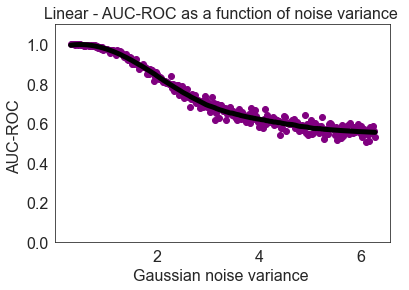

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/390714363.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='g')


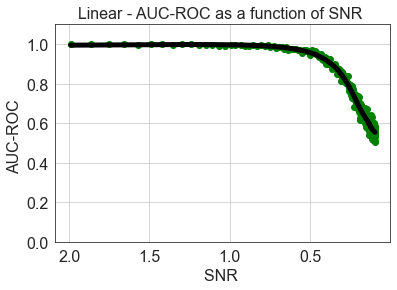

In [9]:

plt.plot((np.array(noise_list)),auc_list, 'bo',color='purple')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("Linear - AUC-ROC as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()



fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='g')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ",  fontsize=16)
ax.set_ylabel("AUC-ROC " ,  fontsize=16)
ax.set_title("Linear - AUC-ROC as a function of SNR " , fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)

plt.show()


<h1>Genes inference as a function of number of cyclic</h1>
Accuracy of the genes inference algorithm as a function of the amount of cycluc genes.
We simulate X "lineage" genes and 500-X cyclic genes, and apply the genes inference algorithm with constant amount of Gaussian noise.


Iteration number: 
0
 function value= 
1.7742752819619952e-25
Iteration number: 
25
 function value= 
1.2921171261824111
Iteration number: 
1
function value= 
15.788501075554183
 AUC-ROC: 0.5749494949494949
Iteration number: 
0
 function value= 
1.9320288993560162e-25
Iteration number: 
25
 function value= 
0.019448886877381843
Iteration number: 
1
function value= 
15.95972676792443
 AUC-ROC: 0.647142857142857
Iteration number: 
0
 function value= 
1.9426504855402274e-25
Iteration number: 
25
 function value= 
0.01988605205388586
Iteration number: 
1
function value= 
16.009423093521228
 AUC-ROC: 0.6299656357388317
Iteration number: 
0
 function value= 
1.9680931913828816e-25
Iteration number: 
25
 function value= 
0.1609001393991487
Iteration number: 
1
function value= 
15.423295583807565
 AUC-ROC: 0.6039583333333333
Iteration number: 
0
 function value= 
1.9757373331819352e-25
Iteration number: 
25
 function value= 
0.001423871199570717
Iteration number: 
1
function value= 
16.3173164

Iteration number: 
1
function value= 
7.152952941943932
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.8562424562234617e-25
Iteration number: 
25
 function value= 
419.6177475341059
Iteration number: 
1
function value= 
6.668000445179903
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.9754024328836165e-25
Iteration number: 
25
 function value= 
388.7850874365737
Iteration number: 
1
function value= 
7.072575665764218
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.9994838349570185e-25
Iteration number: 
25
 function value= 
510.42021523317317
Iteration number: 
1
function value= 
6.848946717935258
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.9567622438225584e-25
Iteration number: 
25
 function value= 
481.98612077678905
Iteration number: 
1
function value= 
6.724925636828108
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.0707659847471153e-25
Iteration number: 
25
 function value= 
476.30854189882155
Iteration number: 
1
function value= 
6.8548913

Iteration number: 
0
 function value= 
4.620886366661542e-25
Iteration number: 
25
 function value= 
3186.108280805932
Iteration number: 
1
function value= 
3.6993268114548057
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.452445160329402e-25
Iteration number: 
25
 function value= 
3189.1949142804924
Iteration number: 
1
function value= 
3.5245096346849305
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.485955420125114e-25
Iteration number: 
25
 function value= 
3545.1687105823685
Iteration number: 
1
function value= 
3.2230451105511797
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.384807610023297e-25
Iteration number: 
25
 function value= 
3236.4750943713834
Iteration number: 
1
function value= 
3.114245253868064
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.167208505472506e-25
Iteration number: 
25
 function value= 
3917.174166425138
Iteration number: 
1
function value= 
3.1321474629290886
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.8529909

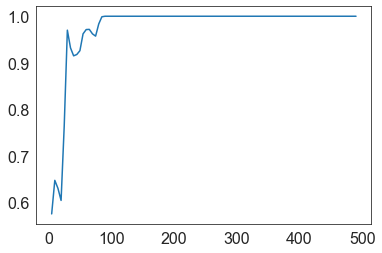

In [10]:
## AUC-ROC as a function of number of cyclic genes
B = tree_array(m=4,p=500,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
genes_num_list =[]
auc_list = []
for i in range(1,99):
    T = copy.deepcopy(A)
    T[:,i*5:500]=B[:,i*5:500]
    y_true = np.zeros(500)
    y_true[i*5:500]=np.ones(500-i*5)
    K = T 
    E_sga  , E_rec_sga = reconstruction_cyclic(K , iterNum=50)
    K = E_rec_sga.dot(K)
    D = filter_cyclic_genes(K, regu =0 , iterNum=20)
    res = np.diagonal(D)
    print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
    auc_list.append(calculate_roc_auc(res,y_true))
    genes_num_list.append(i*5)

auc_a = np.array(auc_list)
genes_num_list = np.array(genes_num_list)
plt.plot(genes_num_list, auc_a)
plt.tick_params(labelsize=16)
plt.show()


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/348061306.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(genes_num_list)),(np.array(auc_list)), 'bo',color='y')


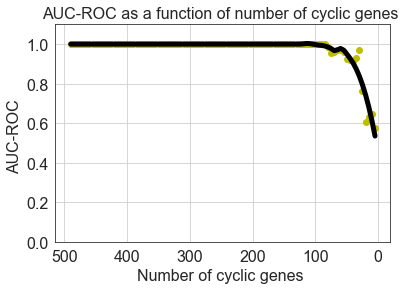

In [11]:
fig, ax = plt.subplots()

ax.plot((np.array(genes_num_list)),(np.array(auc_list)), 'bo',color='y')
ax.plot( (np.array(genes_num_list)),savgol_filter(np.array((np.array(auc_list))),17,3), 'k', linewidth=5.0)
ax.set_xlabel("Number of cyclic genes ", fontsize=16)
ax.set_ylabel("AUC-ROC ", fontsize=16)
ax.set_title("AUC-ROC as a function of number of cyclic genes ", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)
plt.show()


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_42882/3759315042.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(500-genes_num_list,auc_a, 'bo',color='y')


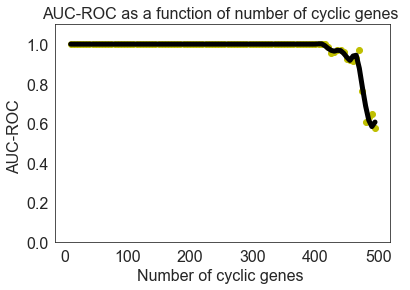

In [12]:
plt.plot(500-genes_num_list,auc_a, 'bo',color='y')
plt.plot( 500-genes_num_list,savgol_filter(np.array(auc_a),7,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of number of cyclic genes ", fontsize=16)
plt.xlabel("Number of cyclic genes ", fontsize=16)
plt.ylabel("AUC-ROC ", fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()


MSE cyclic- 22.433148203832584
MSE lin- 22.518795610545247
Cyclic signal norm- 22.360679774997962
linear signal norm- 22.293496809607984
Noise signal norm- 3.1642398011979616
Cyclic signal norm- 34.342504171357206
Iteration number: 
1
function value: 
1297.2329868695956
Iteration number: 
26
function value: 
1546.56719291431
Iteration number: 
51
function value: 
1814.5024054026007
Iteration number: 
76
function value: 
1947.8333978705896
12.548069608739343
17.411471805648834
starting filtering
25
th Iteration    Loss :: 
18.86125611626019
50
th Iteration    Loss :: 
11.110433447593588
75
th Iteration    Loss :: 
9.764091604527973
100
th Iteration    Loss :: 
9.711436189297613
125
th Iteration    Loss :: 
9.710057008086874
Enhanced signal norm- 28.830219361955226
MSE en- 12.548069608739343
Filtered signal norm- 17.953023560132202
MSE filtered- 13.010741565667065


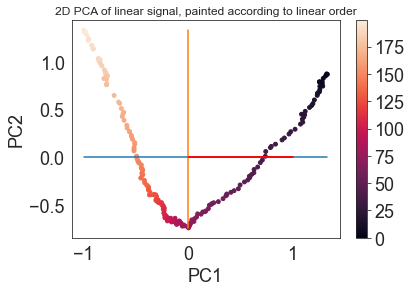

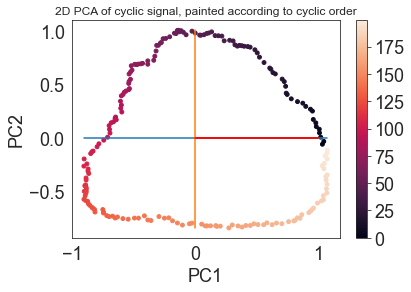

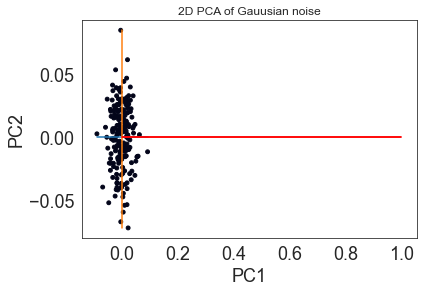

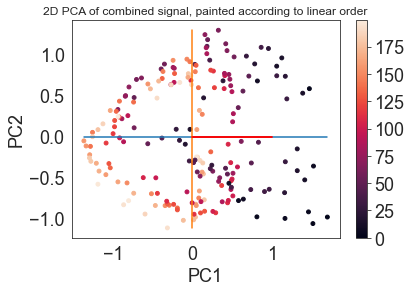

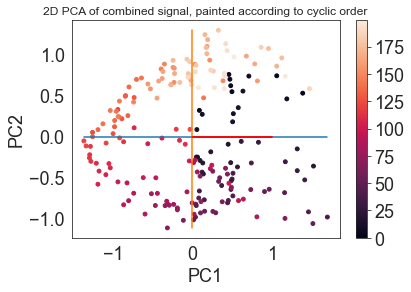

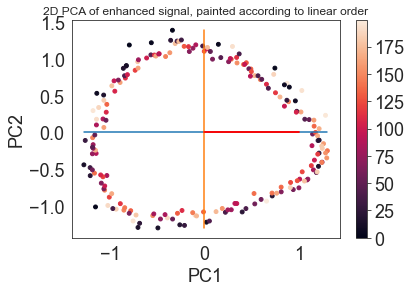

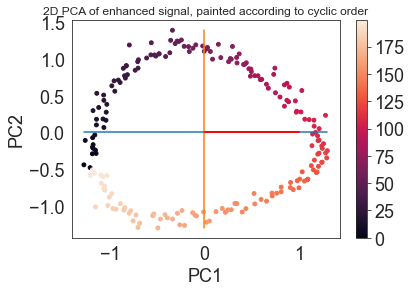

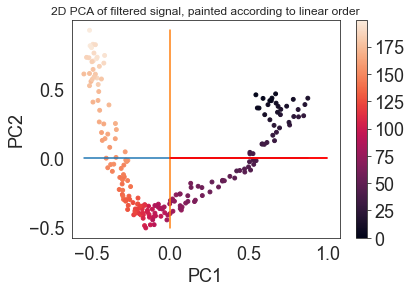

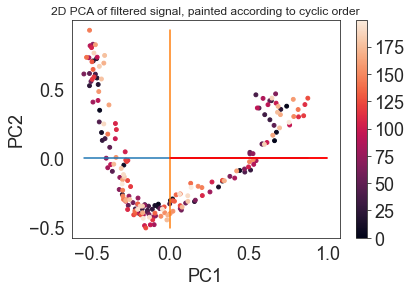

In [18]:
B = simulate_window_linear(ngenes=500,ncells=200,w=0.2) #Create linear signal
B = gene_normalization(B)
E  , perm = get_perm(B.shape[0])
B = E.dot(B)
perm = Perm_to_range(E)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2) #Create cyclic signal
A = gene_normalization(A)
noise = np.random.normal(0,1e-2,A.shape)
C = A + B
C = C + noise
C = np.clip(C,a_max=np.inf,a_min=0)

print("MSE cyclic- " + str(np.linalg.norm(C-A))) #Pre enhancement MSE
print("MSE lin- " + str(np.linalg.norm(C-B))) #Pre Filtering MSE
print("Cyclic signal norm- " + str(np.linalg.norm(A)))
print("linear signal norm- " + str(np.linalg.norm(B)))
print("Noise signal norm- " + str(np.linalg.norm(noise)))
print("Cyclic signal norm- " + str(np.linalg.norm(C)))

F = enhancement_cyclic(C,regu=1e-1 , iterNum=100)
D = F*C

print(np.linalg.norm(A-D)) 
print(np.linalg.norm(C-D)) 
F = filtering_cyclic(C,regu=1e-3, iterNum=1000)
K = F*C

print("Enhanced signal norm- " + str(np.linalg.norm(D)))
print("MSE en- " + str(np.linalg.norm(D-A))) #Post enhancement MSE
print("Filtered signal norm- " + str(np.linalg.norm(K)))
print("MSE filtered- " + str(np.linalg.norm(K-B))) #Post filtering MSE
    
ranged_pca_2d(B,perm,title="2D PCA of linear signal, painted according to linear order")
ranged_pca_2d(A,range(A.shape[0]),title="2D PCA of cyclic signal, painted according to cyclic order")
ranged_pca_2d(noise,np.ones(noise.shape[0]),title="2D PCA of Gauusian noise",dis_colorbar=True)
ranged_pca_2d(C,perm,title="2D PCA of combined signal, painted according to linear order")
ranged_pca_2d(C,range(A.shape[0]),title="2D PCA of combined signal, painted according to cyclic order")
ranged_pca_2d(D,perm,title="2D PCA of enhanced signal, painted according to linear order")
ranged_pca_2d(D,range(A.shape[0]),title="2D PCA of enhanced signal, painted according to cyclic order")
ranged_pca_2d(K,perm,title="2D PCA of filtered signal, painted according to linear order")
ranged_pca_2d(K,range(A.shape[0]),title="2D PCA of filtered signal, painted according to cyclic order")
plt.show()
